[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/elcursodeia-code/blob/master/ml/08_dime_red.ipynb)

# Reducción de la Dimensionalidad

## PCA

Para encontrar los componentes principales utilizamos una técnica estándar de factorización de matrices llamada *Descomposición en Valores Singulares* (SVD) que puede descomponer la matriz de entrenamiento $\bf{X}$ en la multiplicación de tres matrices $\bf{U}$ $\bf{\Sigma}$ $\bf{V}^T$, donde $\bf{V}$ contiene los vectores unitarios que definen todos los componentes principales.

$$
  \mathbf{V} = \left( 
    \begin{array}{cccc}
    | & | & & | \\
    c_1 & c_2 & ... & c_n \\
    | & | & & | 
    \end{array} \right)
$$

Una vez que has identificado todos los componentes principales, puedes reducir la dimensionalidad del conjunto de datos a $d$ dimensiones proyectándolo sobre el hiperplano definido por los primeros $d$ componentes principales.

$$
  \mathbf{X}_d = \mathbf{X} \mathbf{W}_d
$$

donde $\mathbf{W}_d$ contiene las primeras $d$ columnas de $\bf{V}$. Puedes recuperar el conjunto de datos original con

$$
  \mathbf{X} = \mathbf{X}_d \mathbf{W}_d^T
$$

Aunque se pierde algo de información debido a la proyección.

In [1]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

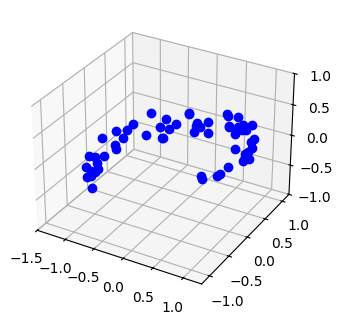

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2], "bo")
ax.set_xlim([-1.5, 1.3])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1, 1])
plt.show()

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
Vt

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ],
       [-0.08626012, -0.31420255,  0.94542898]])

In [4]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [5]:
m, n = X.shape
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

np.allclose(X_centered, U.dot(S).dot(Vt))

True

![](https://upload.wikimedia.org/wikipedia/commons/e/e9/Singular_value_decomposition.gif)

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

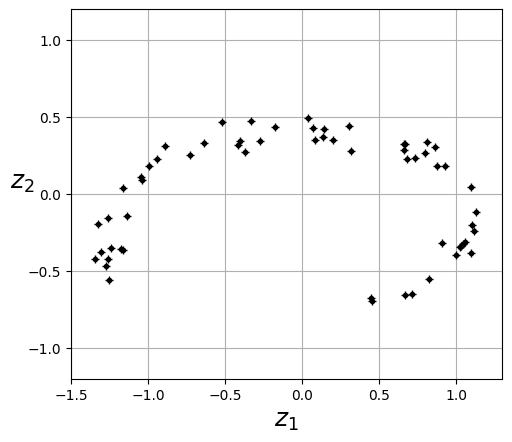

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [9]:
pca.components_

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

In [10]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [11]:
1 - pca.explained_variance_ratio_.sum()

np.float64(0.011195535570688975)

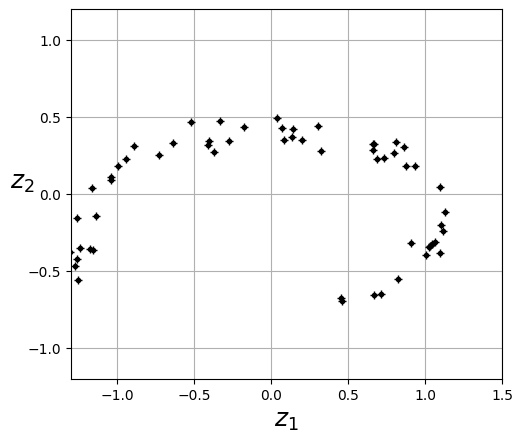

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.3, 1.5, -1.2, 1.2])
ax.grid(True)

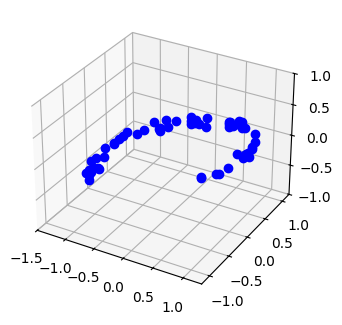

In [13]:
X3D_inv = pca.inverse_transform(X2D)

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "bo")
ax.set_xlim([-1.5, 1.3])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1, 1])
plt.show()

In [14]:
np.allclose(X3D_inv, X)

False

In [15]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1)) # mse

np.float64(0.01017033779284855)

Para elegir el número correcto de dimensiones, podemos especificar un valor mínimo deseado para la varianza y mantener las $d$ dimensiones que cumplan con este criterio (para la visualización de datos, debemos establecer $d$ en 2 o 3).

In [16]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

np.int64(2)

In [17]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [20]:
from sklearn.model_selection import train_test_split

X = mnist["data"].values
y = mnist["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
X.nbytes

439040000

In [24]:
X.shape

(70000, 784)

In [25]:
70000*8*784 / 1024 / 1024 # en megabytes

418.701171875

In [27]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

np.int64(153)

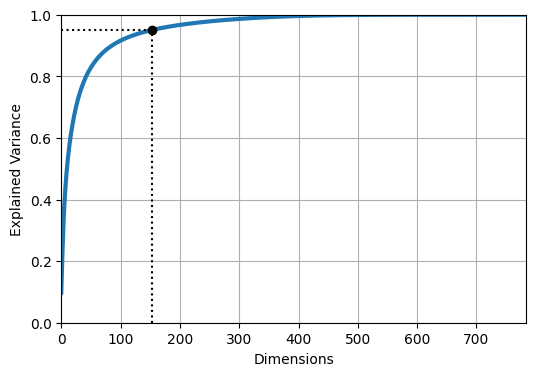

In [29]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 784, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
# plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
#              arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [30]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [31]:
pca.n_components_

np.int64(153)

In [32]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9500608823439145)

In [33]:
X_recovered = pca.inverse_transform(X_reduced)

In [34]:
import matplotlib as mpl 

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

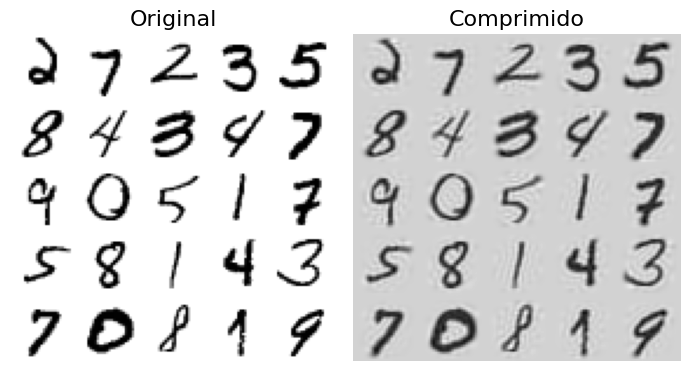

In [36]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Comprimido", fontsize=16)
plt.tight_layout()

Si el conjunto de datos es demasiado grande para caber en la memoria, podemos usar PCA incremental.

In [40]:
from sklearn.decomposition import IncrementalPCA
from tqdm import tqdm

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in tqdm(np.array_split(X_train, n_batches)):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

100%|██████████| 100/100 [00:08<00:00, 11.55it/s]


In [41]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

In [42]:
np.sum(inc_pca.explained_variance_ratio_)

np.float64(0.949838492791706)

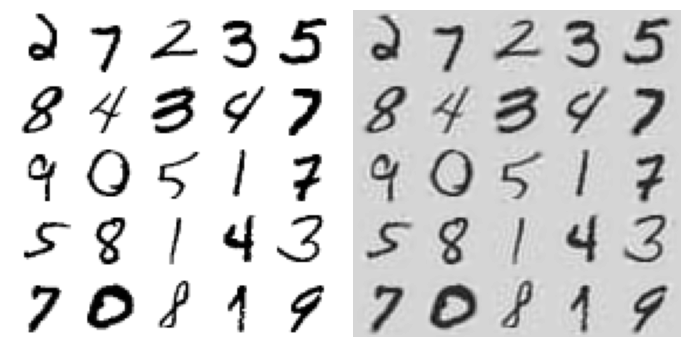

In [43]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

Podemos aplicar el *truco del kernel* para realizar proyecciones no lineales complejas para la reducción de dimensionalidad. Es bueno para preservar grupos de instancias después de la proyección e incluso desenrollar conjuntos de datos que se encuentran en un *manifold*.


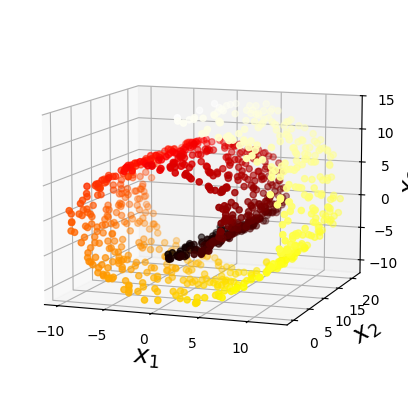

In [44]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

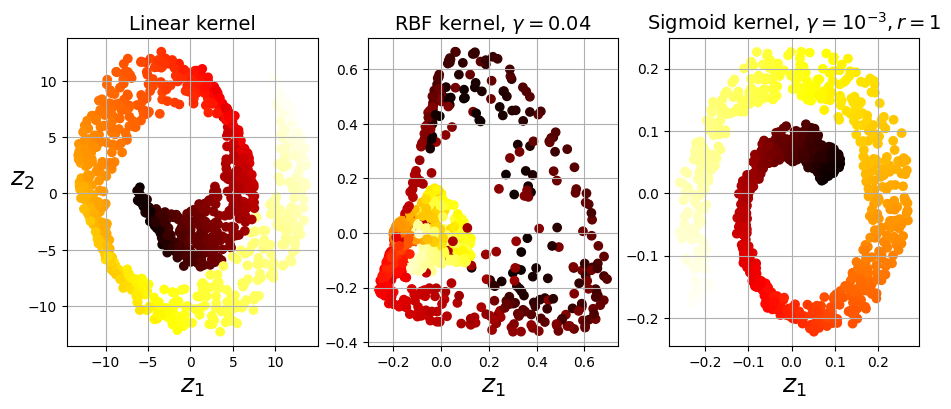

In [45]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

Seleccionar el mejor kernel y los valores de hiperparámetros no es una tarea seniclla, ya que PCA es una tarea no supervisada y no tenemos una métrica de rendimiento. Sin embargo, la reducción de dimensionalidad es normalmente un paso de preprocesamiento para una tarea de aprendizaje supervisado (por ejemplo, clasificación). Esto significa que podemos usar la búsqueda en cuadrícula para seleccionar los hiperparámetros óptimos que conduzcan al mejor rendimiento en esa tarea.

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [47]:
print(grid_search.best_params_)

{'kpca__gamma': np.float64(0.043333333333333335), 'kpca__kernel': 'rbf'}


In [48]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

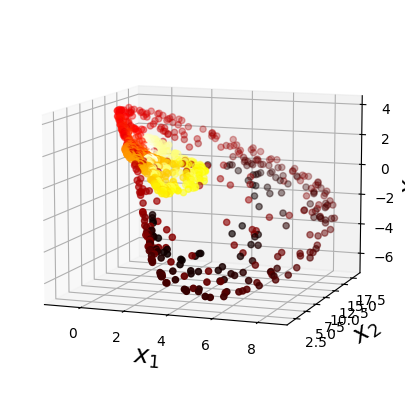

In [49]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_preimage[:, 0], X_preimage[:, 1], X_preimage[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

np.float64(32.786308795766104)

## Otras técnicas

In [51]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [52]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

LLE funciona midiendo primero cómo cada instancia de entrenamiento se relaciona linealmente con sus vecinos más cercanos y luego buscando una representación de baja dimensión del conjunto de entrenamiento donde se preserven mejor estas relaciones locales.

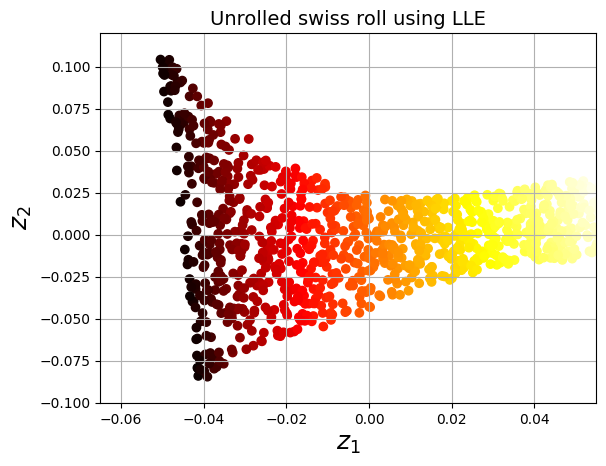

In [53]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

LLE funciona muy bien para desenrollar *manifolds*, pero escala mal a conjuntos de datos muy grandes.

In [54]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [55]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [56]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

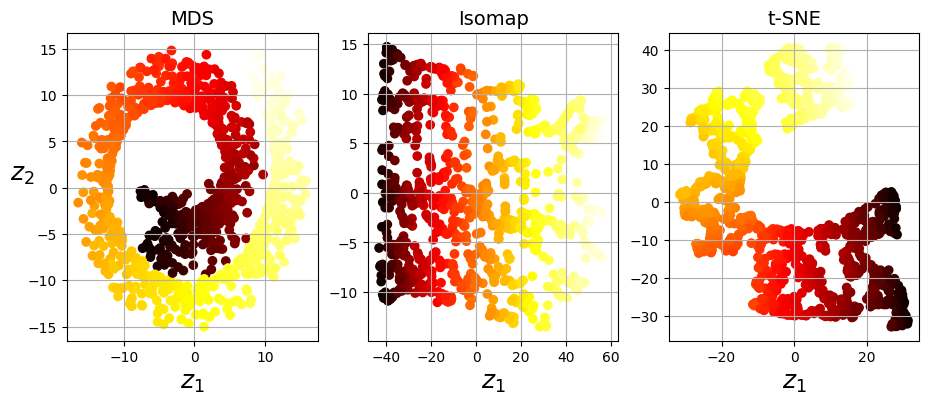

In [57]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()